# Employee Exit Surveys Analysis
**Objectives**

* What are the causes for employee resignation.
* Is there a correlation between the resignation cause and length of service?
* Is there a correlation between the resignation cause and age

**Data available**

* dete_survey.csv
* tafe_survey.csv

**Approach**

* Cleanse and transform data for analysis
* Analyse
* Share results and conclusions

# Executive Summary

The most satisfied are individuals who are just started (under 3 years) and the least Established ( 10 years or less) with Veterans (over 10 years) being slightly happier than Established.

Scroll to the end for detailed conclusions

## Reading and Initial Observations

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [73]:
dete_survey.info()
tafe_survey.info()
dete_survey.iloc[:5]
tafe_survey.iloc[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# dete_survey observations
There are 822 rows and 55 columns
Below "+" marks NaN values in the column

Following personal attributes were not part of the research can be removed:
* Classification
* Business Unit
* Aboriginal + 
* Torres Strait + 
* South Sea
* Disability
* NESB (non english speakers)

Dates columns might need to be converted to Dates

* Cease Date
* DETE Start Date
* Role Start Date

Boolean reasons columns do not have NaN. 
Following reasons ranked but mapping to scale not clear:

* Professional Development +
* Opportunities for promotion +
* Staff morale +
* Workplace issue +
* Physical environment +
* Worklife balance +
* Stress and pressure support +
* Performance of supervisor +
* Peer support +
* Initiative +
* Career Aspirations +
* Feedback +
* Further PD +
* Communication +
* My say +
* Information +
* Kept informed +
* Wellness programs +
* Health & Safety +

Following are individual's attribute columns relevant to the research question:
* Gender +
* Age + There are 10 categories


# tafe_survey observations
There are 702 rows and 71 columns

Following personal attributes were not part of the research can be removed:
* ID Record
* Institute
* WorkArea
* CESSATION YEAR (currently floats)


Following are individual's attribute columns relevant to the research question:
* Gender. What is your Gender? iloc 66 +
* CurrentAge. Current Age iloc 67 + There are 9 categories 61 and older is missing.  
* LengthofServiceOverall (probably this one is not releveant LengthofServiceCurrent)

Reasons for ceasing employment 

* "Reason for ceasing employment" column varied and not mapping to previous survey
    Resignation                 340
    Contract Expired            127
    Retrenchment/ Redundancy    104
    Retirement                   82
    Transfer                     25
    Termination                  23

* Contributing Factors. Career Move - Public Sector contains basically a Yes response and then '-' => cleansing and Combining
* Contributing Factors. Career Move - Private Sector as above
* Contributing Factors. Career Move - Self-employment
* Contributing Factors. Ill Health
* Contributing Factors. Maternity/Family
* Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction - what's the differences
* Contributing Factors. Interpersonal Conflict
* Contributing Factors. Study
* Contributing Factors. Travel
* Contributing Factors. Other => NFA no other information provided remove
* Contributing Factors. NONE => NFA no other information provided remove
* Main Factor. Which of these was the main factor for leaving? IMPORTANT:
    Dissatisfaction with %[Institute]Q25LBL%    23
    Job Dissatisfaction                         22
    Other                                       18
    Career Move - Private Sector                16
    Interpersonal Conflict                       9
    Career Move - Public Sector                  8
    Maternity/Family                             6
    Career Move - Self-employment                4
    Ill Health                                   3
    Travel                                       2
    Study                                        2

* Main Factor. Which of these was the main factor for leaving? (answer rated out of 5)
* Interview perception of environment - contributing factor (iloc 18-65)


# Initial Observations 

* There are many columns that are not relevant for the research - they need to be removed
* Main correlation factors to be considered are age and length of service.  With regards to age decision how to align buckets as one is missing (61 yo +).  With regards to Length of service there needs to be conversation into the length of service for dete_survey between start DETE Start (assumption needs to be made as to the start of the year month as 1) and Cease Date (needs to be converted from object)
* Many columns can be dropped as they are not required for the analysis question
* Decision required which of the resignation reasons include in the research and how to map across organisations
* DETE survey some columns (e.g. start date) record as Not Stated which is equivalent to NaN - re-load data as such
* Also we need to remove columns that would require futher analysis and focus on essentials

In [74]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [75]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [76]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Reason for changes

* Remove uncessary columns to simplify analysis and processing
* Ensure that the 'Not Stated' is treated as NaN

In [77]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('/',' ').str.replace('\s+','_').str.lower().str.strip()

In [78]:
cols_rename = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(columns=cols_rename)

# Reason for change
Standardise column names for readability and easy manipulation.


In [79]:
resignation_types = ['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(resignation_types)].copy()


In [80]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Reason for change
Selected only relevant subset of rows
1. For DETE there are three type of resignation we will accept all of them as resigned and create a new df resignation_types creating subset of data relevant to resignation
2. For TAFE there is one type of resignation we will use it to create as subset df tafe resignations

In [81]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract('(\d\d\d\d)', expand=False).astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [82]:
print('============= DETE Resignations start date ===========')
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True).head(5))
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False).head(5))
print('============= DETE Resignations cease date ===========')
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=True).head(5))
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False).head(5))
print('============= TAFE Resignations cease date ===========')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))

============= DETE Resignations start date ===========
1963.0    1
1971.0    1
1972.0    1
1973.0    1
1974.0    2
Name: dete_start_date, dtype: int64
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
Name: dete_start_date, dtype: int64
============= DETE Resignations cease date ===========
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
============= TAFE Resignations cease date ===========
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


# Observations

* There are some who started employment in 1960s and 70s which would put their stay with the company at 57-47 years
* For TAFE there is count of years of service column
* For DETE we need to compute years of service by subtractig start from cease dates

In [83]:
dete_resignations['institute_service'] =  dete_resignations['cease_date'] - dete_resignations['dete_start_date']



In [86]:
dete_resignations.info()
#dete_resignations['institute_service'].dtype
#tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

# Explanation

Created a new colummns that shows years of service for dete_resigations - compound value not initially existing in the data set


In [131]:
print('============= TAFE different resignation factors ===========')
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

============= TAFE different resignation factors ===========
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

## Explanation
TAFE Dissatisfaction shall be based on 'Contributing Factors. Dissatisfaction' and 'Job Dissatisfaction'
Next steps is to turn these responses into boolean 
- False if does not match to the contributing factors
- True if it does
- NaN if it is NULL

In [88]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

cols = ['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_vals).any(axis=1, skipna=False)

In [89]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

## Explanation

DETE shall be based on combining following columns into one consistent with TAFE and called 'dissatisfied'

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

They are all boolan we will combined them with any function

In [91]:
cols_dete = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

dete_resignations[cols_dete].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


In [92]:
dete_resignations['dissatisfied'] = dete_resignations[cols_dete].any(axis=1, skipna=False)

## Explanation

As data standardisation and cleaning has DETE and TAFE data can be combined.  
We will copy tafe_resignations & dete_resignations to avoid SettingWithCopyWarning

In [93]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()


Before combining add column to identify source of the dataset

In [94]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [95]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis=0)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
combined_updated = combined.dropna(axis=1,thresh=500)
combined_updated.info()
combined_updated.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


# Explanation

1. Combined resignations into one new column that indicates whether an individual was dissatisfied.  
2. Added column to indicate datasource DETE or TAFE
3. Stacked two dfs
4. Removed columns with more than about 150 NaN values

In [99]:
combined_updated.isna().sum().sort_values(ascending=True)

id                    0
separationtype        0
institute             0
dissatisfied          8
cease_date           16
position             53
employment_status    54
age                  55
gender               59
institute_service    88
dtype: int64

In [100]:
combined_updated.reset_index(drop=True, inplace=True)

In [116]:
combined_updated = combined_updated.copy()


In [117]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract('(\d+)', expand=False).astype(float)

combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [118]:
def car_stage(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif year <= 6:
        return 'Experienced'
    elif year <= 10:
        return 'Established'
    else:
        return 'Veteran'




In [119]:
#combined_updated['service_cat'] = flt_institute_service.apply(car_stage)

combined_updated['service_cat'] = combined_updated['institute_service'].apply(car_stage)

In [120]:
combined_updated['service_cat']

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

# Explanation

1. Extracted and converted into numeric values related to the years of service
2. Mapped to the pre-set definitions: New, Experienced etc


In [121]:
combined_updated['dissatisfied'].value_counts()

False    403
True     240
Name: dissatisfied, dtype: int64

In [122]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

## Explanation

Replace NaN with False which is the most common value.  This will enable to pivot values as it does not work with NaN

In [125]:
combined_updated['dissatisfied'].fillna(False, inplace=True)

In [127]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [132]:
plt = combined_updated.pivot_table(values='dissatisfied', index='service_cat', margins=True).sort_values('dissatisfied', ascending=False)

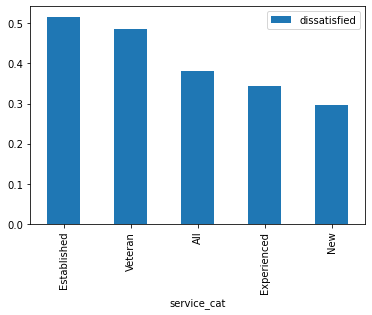

In [133]:
%matplotlib inline

plt.plot(kind='bar')

# Conclusions

The most satisfied are individuals who are just started (under 3 years) and the least Established ( 10 years or less) with Veterans (over 10 years) being slightly happier than Established.  

Interpretation of this could be that the newbies are putting a lot of effort hoping to progress further with their career and achieve other related goals. 

As they work through the years they become more disillusioned.  This perception might be right or wrong as there is only tiny percentage whoc can advance unless organisation is growing.  The perception whether it is on merit is subjective.  

Now we Veterans are slightly happier - because they kind of got used to the fact.

People who leave do not necessarily represent marginal views but those who have other options.  This might mean that many others who stay could be dissatisfied and therefore disengaged.  The letter affects organisational performance quite badly.  Disengagement sets the culture of stagnation whereby large emloyee percentage is focused on doing minimal work to get a paycheck.  